<a href="https://colab.research.google.com/github/A01302935/Proyecto-Integrador-Equipo-19/blob/Avance-1.-An%C3%A1lisis-exploratorio-de-datos/Avance1_19Equipo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

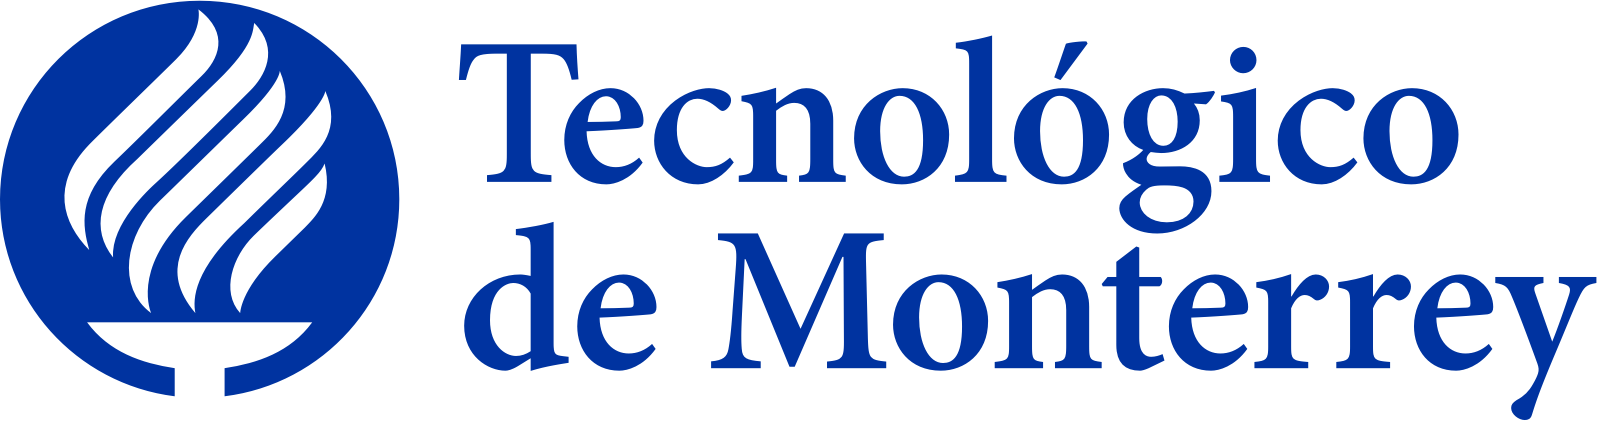
## Proyecto Integrador (Grupo 10)
## Equipo 19
## Avance 1. Analisis Exploratorio de Datos
### Alumnos:

- **[A01302935]**  David Mireles Samaniego
- **[A00618978]** Angel Rodríguez Cardenas



# ITESM
# Maestria en Inteligencia Artificial Aplicada (MNA)
# Proyecto Integrador (Grupo 10)
# Avance 1. Análisis exploratorio de datos Equipo 19
## Alumnos:
# [A01302935] David Mireles Samaniego
# [A00618978] Angel Rodríguez Cardenas       

#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# Primeramente instalar la biblioteca cv2 en la terminal con el comando: pip install opencv-python
# Despues instalar la biblioteca imutils en la terminal con el comando: pip install imutils
# Despues instalar la biblioteca Pillow en la terminal con el comando: pip install Pillow
# Despues instalar la biblioteca Pandas en la terminal con el comando: pip install pandas
# Despues instalar la biblioteca atplotlib en la terminal con el comando:pip install matplotlib
# Despues instalar la biblioteca scipy en la terminal con el comando: pip install scipy
# pip install -U scikit-learn
# pip install seaborn

# Muy importante importar la libreria 'haarcascade_frontalface_default.xml'

In [ ]:
import cv2
import os
import imutils

In [ ]:
personName = 'David'
dataPath = 'C:/Users/polvo/VISUALSTUDIO_ITESM/VERSION FACIL/Data'
personPath = dataPath + '/' + personName

In [ ]:
if not os.path.exists(personPath):
    print('Carpeta creada: ',personPath)
    os.makedirs(personPath)

In [ ]:
cap = cv2.VideoCapture('David.mp4')
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
count = 0

In [ ]:
while True:
    ret, frame = cap.read()
    if ret == False: break
    frame =  imutils.resize(frame, width=640)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    auxFrame = frame.copy()

    faces = faceClassif.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
        rostro = auxFrame[y:y+h,x:x+w]
        rostro = cv2.resize(rostro,(150,150),interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(personPath + '/rotro_{}.jpg'.format(count),rostro)
        count = count + 1
    cv2.imshow('frame',frame)

    k =  cv2.waitKey(1)
    if k == 27 or count >= 300:
        break

In [ ]:
cap.release()
cv2.destroyAllWindows()

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Las siguientes son algunas de las preguntas comunes que podrán abordar a través del EDA:

_________________________________________________________________________________________________________________________________________________________
¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

In [53]:
import os
from PIL import Image

In [54]:
def check_missing_or_invalid_images(folder_path):
    """
    Verifica imágenes faltantes, corruptas o inválidas en una carpeta.

    Args:
        folder_path (str): Ruta a la carpeta con imágenes.

    Returns:
        dict: Información sobre imágenes faltantes o inválidas.
    """
    missing_files = []
    corrupt_files = []
    invalid_images = []

    # Listar archivos en la carpeta
    all_files = os.listdir(folder_path)
    image_files = [f for f in all_files if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp"))]

    for file_name in image_files:
        file_path = os.path.join(folder_path, file_name)
        try:
            with Image.open(file_path) as img:
                # Verificar dimensiones y píxeles
                width, height = img.size

                if width == 0 or height == 0:
                    invalid_images.append(file_name)

                # Opcional: verificar si la imagen tiene píxeles uniformes
                if img.getextrema() == ((0, 0),):  # Ejemplo para imágenes completamente negras
                    invalid_images.append(file_name)

        except Exception as e:
            corrupt_files.append((file_name, str(e)))

    return {
        "total_files": len(all_files),
        "total_images": len(image_files),
        "missing_files": missing_files,
        "corrupt_files": corrupt_files,
        "invalid_images": invalid_images,
    }

In [55]:
# Ejemplo de uso
if __name__ == "__main__":
    folder_path = "/content/Data/David"  # Cambia esto por la ruta a tu conjunto de imágenes
    report = check_missing_or_invalid_images(folder_path)

    print("\nReporte de valores faltantes o inválidos:")
    for key, value in report.items():
        print(f"{key}: {value}")

    if report["corrupt_files"]:
        print("\nImágenes corruptas:")
        for file, error in report["corrupt_files"]:
            print(f"{file}: {error}")

    if report["invalid_images"]:
        print("\nImágenes inválidas:")
        for file in report["invalid_images"]:
            print(file)


Reporte de valores faltantes o inválidos:
total_files: 300
total_images: 300
missing_files: []
corrupt_files: []
invalid_images: []


En el análisis de imágenes por computadora, los valores faltantes pueden aparecer de diversas formas y afectan la calidad del análisis.
Algunos ejemplos errores y sus formas de identificar patrones de ausencia, son:

CAUSAS COMUNES DE LOS VALORES FALTANTES EN IMAGENES

1.- Pixeles ausentes o dañados:
Algunas imágenes pueden tener regiones oscuras (valores constantes como 0 o NaN) debido a defectos en los sensores o compresión excesiva.

2.- Recortes o modificaciones:
Partes de la imagen pueden estar recortadas o intencionalmente omitidas por preprocesamiento.

3.- Canales incompletos:
Falta de información en ciertos canales de color (por ejemplo, RGB incompleto).

4.- Errores en el etiquetado:
En conjuntos de datos etiquetados, las etiquetas pueden estar ausentes o ser incorrectas.

5.- Bloqueos u Colusiones:
Partes del objeto de interés pueden estar ocultas en las imágenes, dificultando la segmentación o clasificación.

EN LOS DATOS CON LOS QUE SE HA ESTADO TRABAJANDO NO SE HA ENCONTRADO NINGUNO DE ESTOS TIPOS DE ERRORES

_________________________________________________________________________________________________________________________________________________________
¿Cuáles son las estadísticas resumidas del conjunto de datos?

In [48]:
## Primeramente instalar la biblioteca pillow
## pip install Pillow
import os
from PIL import Image, ImageStat
import numpy as np

In [49]:
def get_image_statistics(image_path):
    """
    Calcula estadísticas básicas para una imagen dada.

    Args:
        image_path (str): Ruta de la imagen.

    Returns:
        dict: Estadísticas incluyendo tamaño, brillo promedio y contraste.
    """
    try:
        with Image.open(image_path) as img:
            # Convertir la imagen a escala de grises para analizar brillo y contraste
            grayscale_img = img.convert("L")

            # Obtener tamaño (resolución)
            width, height = img.size

            # Estadísticas básicas
            stat = ImageStat.Stat(grayscale_img)
            brightness = stat.mean[0]  # Promedio de brillo
            contrast = stat.stddev[0]  # Desviación estándar como medida de contraste

            return {
                "file_name": os.path.basename(image_path),
                "width": width,
                "height": height,
                "brightness": brightness,
                "contrast": contrast,
            }
    except Exception as e:
        print(f"Error procesando {image_path}: {e}")
        return None

In [50]:
def analyze_image_dataset(folder_path):
    """
    Analiza un conjunto de imágenes en una carpeta para calcular estadísticas resumidas.

    Args:
        folder_path (str): Ruta a la carpeta con imágenes.

    Returns:
        dict: Estadísticas generales del conjunto de imágenes.
    """
    all_stats = []

    # Iterar sobre las imágenes en la carpeta
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
            stats = get_image_statistics(file_path)
            if stats:
                all_stats.append(stats)

    # Calcular estadísticas resumidas
    if all_stats:
        widths = [s["width"] for s in all_stats]
        heights = [s["height"] for s in all_stats]
        brightnesses = [s["brightness"] for s in all_stats]
        contrasts = [s["contrast"] for s in all_stats]

        summary = {
            "total_images": len(all_stats),
            "average_width": np.mean(widths),
            "average_height": np.mean(heights),
            "average_brightness": np.mean(brightnesses),
            "average_contrast": np.mean(contrasts),
            "min_brightness": np.min(brightnesses),
            "max_brightness": np.max(brightnesses),
            "min_contrast": np.min(contrasts),
            "max_contrast": np.max(contrasts),
        }

        return summary, all_stats
    else:
        print("No se encontraron imágenes válidas en la carpeta.")
        return None, None

In [51]:
# Ejemplo de uso
if __name__ == "__main__":
    folder_path = "/content/Data/David"  # Cambia esto por la ruta a tu conjunto de imágenes
    summary, all_stats = analyze_image_dataset(folder_path)

    if summary:
        print("\nEstadísticas resumidas del conjunto de imágenes:")
        for key, value in summary.items():
            print(f"{key}: {value}")

        print("\nDetalles por imagen:")
        for stats in all_stats:
            print(stats)


Estadísticas resumidas del conjunto de imágenes:
total_images: 300
average_width: 150.0
average_height: 150.0
average_brightness: 98.1383922962963
average_contrast: 41.01704334820168
min_brightness: 95.34897777777778
max_brightness: 101.2784
min_contrast: 39.21767341708186
max_contrast: 42.434764946575484

Detalles por imagen:
{'file_name': 'rotro_229.jpg', 'width': 150, 'height': 150, 'brightness': 98.80066666666667, 'contrast': 41.477104254435766}
{'file_name': 'rotro_236.jpg', 'width': 150, 'height': 150, 'brightness': 97.86151111111111, 'contrast': 40.42323889855779}
{'file_name': 'rotro_240.jpg', 'width': 150, 'height': 150, 'brightness': 96.93213333333334, 'contrast': 40.87743488777695}
{'file_name': 'rotro_239.jpg', 'width': 150, 'height': 150, 'brightness': 97.8144, 'contrast': 40.87366168214766}
{'file_name': 'rotro_188.jpg', 'width': 150, 'height': 150, 'brightness': 98.42644444444444, 'contrast': 40.98936949749861}
{'file_name': 'rotro_233.jpg', 'width': 150, 'height': 150,

Estadísticas comunes de imágenes
Dimensiones:
Del video 1280 X 720  pixeles y de las imagenes 150 X 150 pixeles

Promedio, mínimo, máximo y rango de alturas y anchuras de las imágenes en píxeles.
imagenes 150 X 150 pixeles en todos los datos

Proporción de aspectos (ancho/alto). Ancho 99 ppp y Alto 99 ppp
Distribución de intensidad: Proporcion 1:1 a 150 X 150 pixeles, profundidad de bits 24

Promedio y desviación estándar de los valores de los píxeles por canal (RGB, escala de grises, etc.).
Histogramas de intensidad para cada canal.
Tamaño de archivo: Alrrededor de 8.2KB por imagen, en formato .jpg

Promedio, mínimo y máximo de los tamaños de los archivos en kilobytes o megabytes.
Número de canales:Alrrededor de 8KB por imagen

Distribución de imágenes con diferentes configuraciones de canales (por ejemplo, RGB, RGBA, escala de grises).
Rango dinámico: RGB

Rango de valores de píxeles por canal (e.g., 0-255 para imágenes de 8 bits).  Ancho 99 ppp y Alto 99 ppp

_________________________________________________________________________________________________________________________________________________________
¿Hay valores atípicos en el conjunto de datos?

In [36]:
import numpy as np
import cv2
import os

In [37]:
# Función para cargar las imágenes de un directorio
def cargar_imagenes(directorio):
    imagenes = []
    for archivo in os.listdir('/content/Data/David'):
        if archivo.endswith('.jpg') or archivo.endswith('.png'):
            img = cv2.imread(os.path.join(directorio, archivo), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                imagenes.append(img)
    return imagenes

In [38]:
# Función para detectar valores atípicos en las imágenes
def detectar_valores_atipicos(imagenes, umbral=3):
    valores_pixel = []

    # Extraer los valores de los píxeles de todas las imágenes
    for img in imagenes:
        valores_pixel.extend(img.flatten())

    valores_pixel = np.array(valores_pixel)

    # Calcular la media y la desviación estándar
    media = np.mean(valores_pixel)
    desviacion_estandar = np.std(valores_pixel)

    # Detectar los valores atípicos basados en el umbral de desviación estándar
    atipicos = valores_pixel[np.abs(valores_pixel - media) > umbral * desviacion_estandar]

    return atipicos

In [39]:
# Directorio donde se encuentran las imágenes
directorio_imagenes = '/content/Data/David'

In [40]:
# Cargar las imágenes
imagenes = cargar_imagenes(directorio_imagenes)

In [41]:
# Detectar valores atípicos
valores_atipicos = detectar_valores_atipicos(imagenes)

In [42]:
# Imprimir el número de valores atípicos
print(f"Se encontraron {len(valores_atipicos)} valores atípicos.")

Se encontraron 0 valores atípicos.


_________________________________________________________________________________________________________________________________________________________
¿Cuál es la cardinalidad de las variables categóricas?

In [43]:
# Aun no tenemos los datos en un modelo de redes neuronales para poder etiquetarlo pero algo basico que podemos hacer es:
import pandas as pd

In [44]:
# Simulación de un conjunto de datos con etiquetas de imágenes
# Imagina que tenemos un DataFrame con los nombres de las imágenes y sus etiquetas
data = {
    'imagen': ['rotro_0.jpg', 'rotro_1.jpg', 'rotro_2.jpg', 'rotro_3.jpg', 'rotro_4.jpg'],
    'etiqueta': ['feliz', 'sorprendido', 'angustiado', 'ansioso', 'confusion']
}

In [45]:
df = pd.DataFrame(data)

In [46]:
# Calcular la cardinalidad de la variable categórica 'etiqueta'
cardinalidad_etiquetas = df['etiqueta'].nunique()

In [47]:
# Imprimir la cardinalidad
print(f"La cardinalidad de las etiquetas es: {cardinalidad_etiquetas}")

La cardinalidad de las etiquetas es: 5


La cardinalidad de las variables categóricas en el análisis de rostros en visión por computadora depende de las tareas específicas y los tipos de etiquetas
utilizadas. A continuación, se describen las variables categóricas comunes y su cardinalidad esperada:
aun no tenemos un modelo de redes nuronales que nos pueda dar esos valores

VARIABLES CATEGÓRICAS Y CARDINILIDAD TÍPICA.
1.- Identidad de las personas (ID):

  1.-Descripción: Representa a individuos únicos en el conjunto de datos.
  *Cardinalidad: Alta, dependiendo del número de personas en el conjunto (puede variar de decenas a miles).
      *Ejemplo:
          *LFW (Labelled Faces in the Wild): ~5,700 identidades.
          *VGGFace2: ~9,000 identidades.
  2.-Género:
  *Descripción: Masculino, femenino, u otras categorías de género.
  *Cardinalidad: Generalmente baja (2-3 categorías).
      *Ejemplo: Masculino, Femenino, No especificado.
  3.-Edad:
  *Descripción: Rangos de edad o categorías específicas (niño, adolescente, adulto, anciano).
  *Cardinalidad: Puede ser baja o moderada, dependiendo de cómo se agrupe la edad.
      *Ejemplo:
          *Rangos: [0-10], [11-20], ..., [60+].
          *Clases exactas (edad específica): 0-100.
  4.-Expresiones faciales:
  *Descripción: Categorías de emociones detectadas en el rostro.
  *Cardinalidad: Generalmente baja, con 6-8 clases estándar.
      Ejemplo: Felicidad, Tristeza, Sorpresa, Enojo, Miedo, Desagrado, Neutral.
  5.- Accesorios:
  *Descripción: Presencia de objetos como gafas, sombreros, máscaras, etc.
  *Cardinalidad: Baja, dependiendo del tipo de accesorio.
      *Ejemplo: Gafas (sí/no), Sombrero (sí/no).
          *Orientación de la cabeza (Pose):
  6.- Descripción: Dirección en la que está orientado el rostro.
  *Cardinalidad: Baja, con clases como Frontal, Izquierda, Derecha, Arriba, Abajo.
      *Ejemplo: 5-10 categorías para ángulos discretizados.
          *Iluminación:
  7.-Descripción: Categorías basadas en las condiciones de iluminación (natural, artificial, etc.).
  *Cardinalidad: Baja, con clases predefinidas.
      *Ejemplo: Iluminación tenue, media, brillante.
          *Casos con cardinalidad elevada
          *En algunos casos, la cardinalidad puede ser muy alta:
  8.-Identidades con miles de personas.
  *Accesorios combinados: Presencia de múltiples combinaciones de accesorios (por ejemplo, gafas + sombrero).
  *Para manejar estos casos, es común usar técnicas de reducción de dimensionalidad o agrupar categorías menos
  *frecuentes en una sola clase ("Otros").

_________________________________________________________________________________________________________________________________________________________
¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import cv2
import os

In [20]:
# Función para cargar las imágenes de un directorio y convertirlas en escala de grises
def cargar_imagenes(directorio):
    imagenes = []
    for archivo in os.listdir(directorio):
        if archivo.endswith('.jpg') or archivo.endswith('.png'):
            img = cv2.imread(os.path.join(directorio, archivo), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                imagenes.append(img)
    return imagenes

In [21]:
# Función para extraer características de las imágenes (por ejemplo, media de los píxeles)
def extraer_caracteristicas(imagenes):
    características = []
    for img in imagenes:
        características.append(np.mean(img))  # Característica simple: media de los píxeles
    return np.array(características)

In [22]:
# Visualización de la distribución y transformación
def visualizar_transformacion(características):
    # Distribución original
    plt.subplot(1, 2, 1)
    plt.hist(características, bins=20)
    plt.title('Distribución Original')

    # Transformación logarítmica
    características_log = np.log1p(características)  # Usamos log1p para manejar ceros
    plt.subplot(1, 2, 2)
    plt.hist(características_log, bins=20)
    plt.title('Distribución después de Transformación Logarítmica')

    plt.show()

In [23]:
# Directorio donde se encuentran las imágenes
directorio_imagenes = '/content/Data/David'

In [24]:
# Cargar las imágenes
imagenes = cargar_imagenes(directorio_imagenes)

In [25]:
# Extraer características (en este caso, la media de los píxeles)
características = extraer_caracteristicas(imagenes)

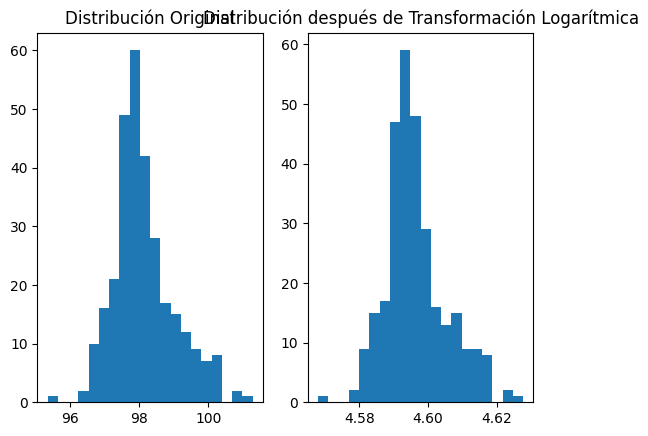

In [26]:
# Visualizar distribución original y transformada
visualizar_transformacion(características)

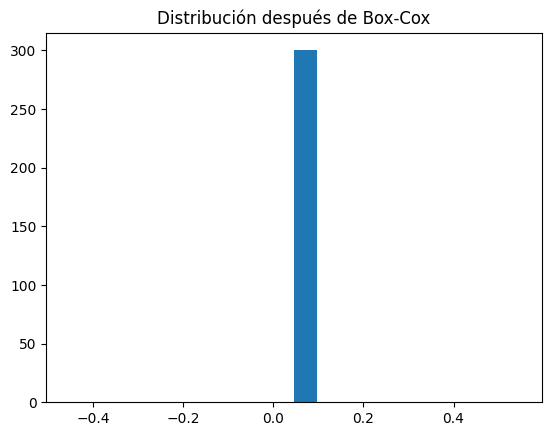

In [27]:
# Aplicar transformación de Box-Cox si la distribución tiene valores positivos
if np.all(características > 0):
    características_boxcox, _ = boxcox(características)
    plt.hist(características_boxcox, bins=20)
    plt.title('Distribución después de Box-Cox')
    plt.show()
else:
    print("No se puede aplicar Box-Cox a características con valores negativos o cero.")

En el análisis de rostros con visión por computadora, es común encontrar distribuciones sesgadas en el conjunto de datos, lo que puede afectar la eficacia del modelo y
requerir transformaciones no lineales para mejorar la representación o el aprendizaje. Aquí te detallo los aspectos clave:

Distribuciones sesgadas típicas en análisis de rostros
Distribución de clases (sesgo de clase):

En tareas como clasificación de identidades o expresiones faciales, algunas clases suelen estar sobrerrepresentadas (por ejemplo, rostros de adultos jóvenes)
mientras que otras tienen menos ejemplos (niños o ancianos).
Impacto: Los modelos pueden inclinarse hacia las clases mayoritarias, ignorando las minoritarias.
Distribución de edades:

Frecuentemente sesgada hacia adultos jóvenes, con menos ejemplos de niños y personas mayores.
Impacto: Modelos de estimación de edad pueden ser inexactos para grupos menos representados.
Distribución de poses:

Sesgo hacia poses frontales, ya que muchas imágenes de entrenamiento están tomadas en condiciones controladas.
Impacto: El modelo podría tener dificultades para generalizar a poses laterales o inusuales.
Distribución de iluminación:

Sesgo hacia iluminación uniforme o brillante en imágenes capturadas en estudios, mientras que las condiciones reales pueden incluir sombras o poca luz.
Impacto: Modelos podrían fallar en ambientes con iluminación desigual.
Distribución de género y etnicidad:

Conjuntos de datos de rostros tienden a estar dominados por ciertos géneros o grupos étnicos (por ejemplo, hombres caucásicos).
Impacto: Reducción en la equidad y precisión para otros grupos.
Cuándo aplicar transformaciones no lineales
Transformaciones no lineales pueden ser útiles en diferentes contextos del análisis de rostros:

Para reducir el sesgo en los datos de entrada:

Normalización no lineal: Transformaciones como raíz cuadrada o logaritmo pueden ayudar a manejar distribuciones de intensidad o brillo muy sesgadas.
Ejemplo: Aplicar:
log(1+𝑥)
log(1+x) para valores de intensidad de píxeles en imágenes de alto rango dinámico.
Para mejorar la separación de características:

Mapeos no lineales en representaciones latentes: Usar arquitecturas profundas que transformen las imágenes originales en espacios latentes más útiles.
Ejemplo: Redes neuronales convolucionales (CNNs) ya aplican transformaciones no lineales mediante funciones como ReLU o Swish.
Para ajustar la distribución de clases:

Sobremuestreo/Sobreescritura: Aplicar técnicas como SMOTE o reponderar clases minoritarias en las pérdidas.
Para manejar variaciones de escala:

Transformaciones gamma: A menudo utilizadas en la preprocesamiento de imágenes para normalizar la iluminación desigual.
Ejemplo de aplicación práctica
Técnicas de balance de clases:

Aplicar ponderación en la función de pérdida para que las clases minoritarias tengan mayor importancia.
Recolección de más datos o generación de datos sintéticos para equilibrar clases.
Normalización en distribuciones altamente sesgadas:

Escalado no lineal en características como brillo, contraste o rango de edades.
Augmentación de datos:

Introducir variaciones de pose, iluminación y expresiones para reducir el sesgo en las distribuciones.

_________________________________________________________________________________________________________________________________________________________
¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).

No aplica para la naturaleza del proyecto y los datos con los que se trabajara

_________________________________________________________________________________________________________________________________________________________
¿Hay correlación entre las variables dependientes e independientes?

In [12]:
#En nuestra base de datos falta aun que agregemos etiquetas, pero el script que proponemos seria de este tipo, pues aun no tenemos nuestro modelo entrenado
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Supón que tienes un DataFrame con características extraídas (por ejemplo, PCA o características de la cara) y etiquetas
Ejemplo con características numéricas y etiquetas de clase

In [13]:
# Simulación de características (independientes) y etiquetas de clase (dependientes)
np.random.seed(42)
num_imagenes = 100

In [14]:
# Características numéricas (por ejemplo, valores extraídos de las imágenes)
caracteristicas = np.random.rand(num_imagenes, 5)  # 5 características extraídas de las imágenes

In [15]:
# Etiquetas de clase (por ejemplo, identidades de las personas)
etiquetas = np.random.choice(['persona_1', 'persona_2', 'persona_3'], size=num_imagenes)

In [16]:
# Crear un DataFrame
df = pd.DataFrame(caracteristicas, columns=[f'caracteristica_{i+1}' for i in range(5)])
df['etiqueta'] = etiquetas

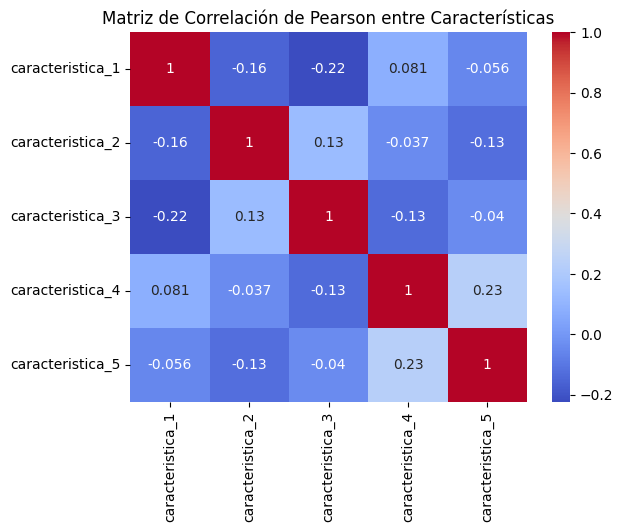

In [17]:
# 1. Correlación de Pearson entre características numéricas (variables independientes)
corr_matrix = df.drop('etiqueta', axis=1).corr()  # Eliminar la columna de etiquetas
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación de Pearson entre Características")
plt.show()

2. Correlación de Cramér's V entre las características y las etiquetas (variables categóricas)
Para correlación entre variables categóricas, usaremos una función personalizada para Cramér's V

In [9]:
import scipy.stats as stats

In [10]:
def cramers_v(categoria1, categoria2):
    contingency_table = pd.crosstab(categoria1, categoria2)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

In [11]:
# Calcular la correlación de Cramér's V entre la variable de etiqueta y las características
for column in df.drop('etiqueta', axis=1).columns:
    correlation_cramers_v = cramers_v(df[column], df['etiqueta'])
    print(f"Correlación de Cramér's V entre {column} y 'etiqueta': {correlation_cramers_v:.4f}")

Correlación de Cramér's V entre caracteristica_1 y 'etiqueta': 1.0000
Correlación de Cramér's V entre caracteristica_2 y 'etiqueta': 1.0000
Correlación de Cramér's V entre caracteristica_3 y 'etiqueta': 1.0000
Correlación de Cramér's V entre caracteristica_4 y 'etiqueta': 1.0000
Correlación de Cramér's V entre caracteristica_5 y 'etiqueta': 1.0000


En el análisis de rostros con visión por computadora, es común investigar la correlación entre las variables dependientes (etiquetas o predicciones, como:
edad, género, expresión facial, etc.) y las variables independientes (características extraídas de las imágenes). A continuación, exploramos este aspecto
con detalle:

Correlación entre variables en análisis de rostros
1.- Variables dependientes comunes:

      Edad.
      Género.
      Expresión facial.
      Identidad de personas.
      Pose (orientación de la cabeza).
      Variables independientes comunes:

2.- Características de los píxeles (valores RGB, texturas).
      Características de alto nivel extraídas por modelos (embeddings o representaciones latentes).
      Factores externos (iluminación, fondo, accesorios).

      Ejemplos de correlación esperada
      1.- Edad y textura facial:

          Correlación:
          Las arrugas y cambios en la textura de la piel son fuertes predictores de la edad.
      Análisis:
          La textura de bajo nivel (frecuencias espaciales altas) tiene correlación positiva con el envejecimiento.
          Representaciones profundas (como embeddings de redes neuronales) también capturan esta correlación.
      2.-Género y forma facial:

      Correlación:
          Características como la forma del rostro, la mandíbula o la distribución del cabello tienden a correlacionarse con el género en ciertos conjuntos de datos.
          Limitación:
          Estas correlaciones pueden estar sesgadas si el conjunto de datos no es diverso (e.g., sesgo étnico o cultural).
      3.-Expresión facial y regiones específicas:

          Correlación:
          Los movimientos de los músculos faciales (sonrisa, ceño fruncido, etc.) afectan ciertas áreas del rostro, como los ojos y la boca.
          Análisis:
               Redes convolucionales suelen asignar mayor importancia a estas regiones al clasificar expresiones.
      4.-Pose y características de fondo:

          Correlación:
          Las poses extremas pueden influir en la percepción de la identidad y las características faciales.
      5.-Accesorios y variables dependientes:

          Correlación negativa:
          Gafas o máscaras pueden reducir la precisión en la predicción de género, expresión o edad.

Métodos para medir correlaciones
Análisis estadístico:

Coeficientes de correlación:
Usar métricas como Pearson, Spearman o Kendall para medir la correlación entre variables continuas (e.g., edad y características latentes).
Matrices de correlación:
Evaluar la relación entre múltiples variables.
Análisis basado en modelos:

Importancia de características:
Usar modelos interpretables (e.g., árboles de decisión) para identificar qué variables independientes influyen más en las predicciones.
Mapas de calor activados por gradiente (Grad-CAM):
Visualizar regiones de la imagen relevantes para la predicción.
Análisis en el espacio latente:

Evaluar cómo se agrupan o separan las clases (género, expresión, etc.) en un espacio de embeddings mediante técnicas como t-SNE o PCA.

Desafíos de la correlación
Sesgo en los datos:

Correlaciones aparentes pueden ser artefactos del conjunto de datos, no propiedades reales (e.g., género correlacionado con fondo o iluminación).
Correlaciones espurias:

Factores no relacionados (como el fondo de la imagen) pueden influir en la predicción.
Multicolinealidad:

Algunas variables independientes pueden estar altamente correlacionadas entre sí, afectando la interpretación del modelo.

In [1]:
#_________________________________________________________________________________________________________________________________________________________
#¿Cómo se distribuyen los datos en función de diferentes categorías? (análisis bivariado)
# Aun no tenemos los datos entrenados pero el scrip propuesto seria de esta forma
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Simulación de un conjunto de datos
np.random.seed(42)
num_imagenes = 100

In [3]:
# Simulamos características extraídas de las imágenes (por ejemplo, PCA)
caracteristicas = np.random.rand(num_imagenes, 5)  # 5 características extraídas

In [4]:
# Simulamos etiquetas de clase (identidades de las personas)
etiquetas = np.random.choice(['persona_1', 'persona_2', 'persona_3'], size=num_imagenes)

In [5]:
# Crear un DataFrame
df = pd.DataFrame(caracteristicas, columns=[f'caracteristica_{i+1}' for i in range(5)])
df['etiqueta'] = etiquetas

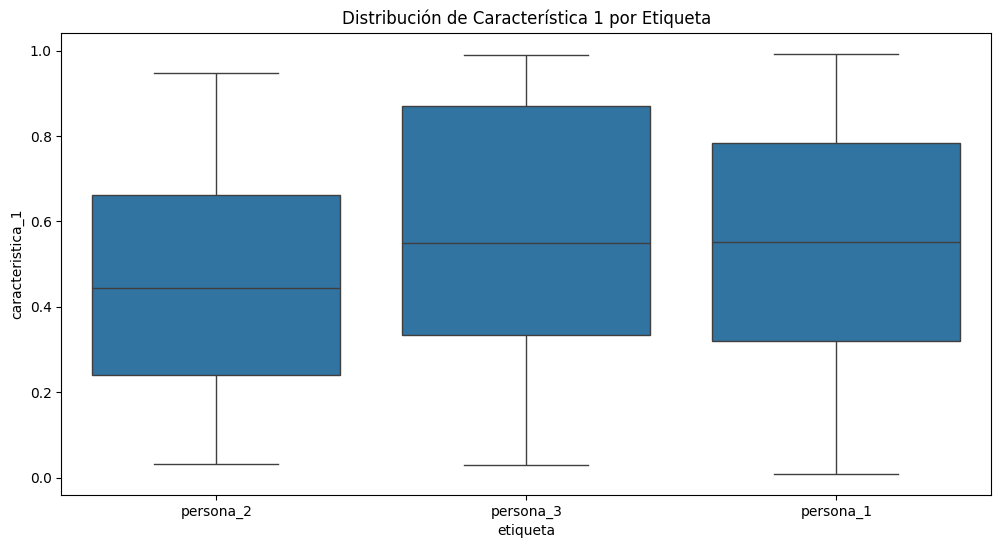

In [6]:
# 1. Análisis bivariado usando un Diagrama de Cajas (Boxplot) para observar la distribución de características por etiqueta
plt.figure(figsize=(12, 6))
sns.boxplot(x='etiqueta', y='caracteristica_1', data=df)  # Comparar 'caracteristica_1' entre diferentes personas
plt.title('Distribución de Característica 1 por Etiqueta')
plt.show()

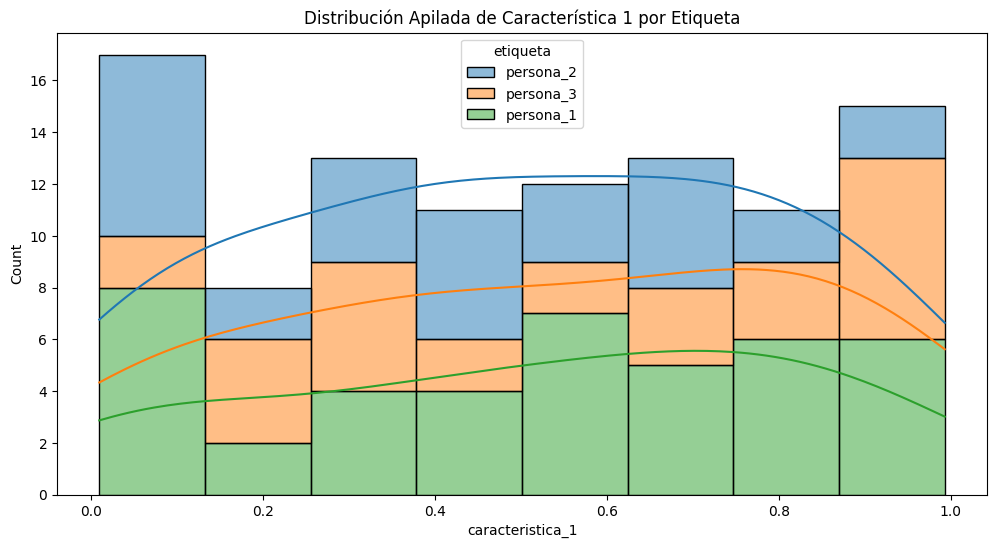

In [7]:
# 2. Análisis bivariado usando un Histograma Apilado (Stacked Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='caracteristica_1', hue='etiqueta', multiple='stack', kde=True)
plt.title('Distribución Apilada de Característica 1 por Etiqueta')
plt.show()

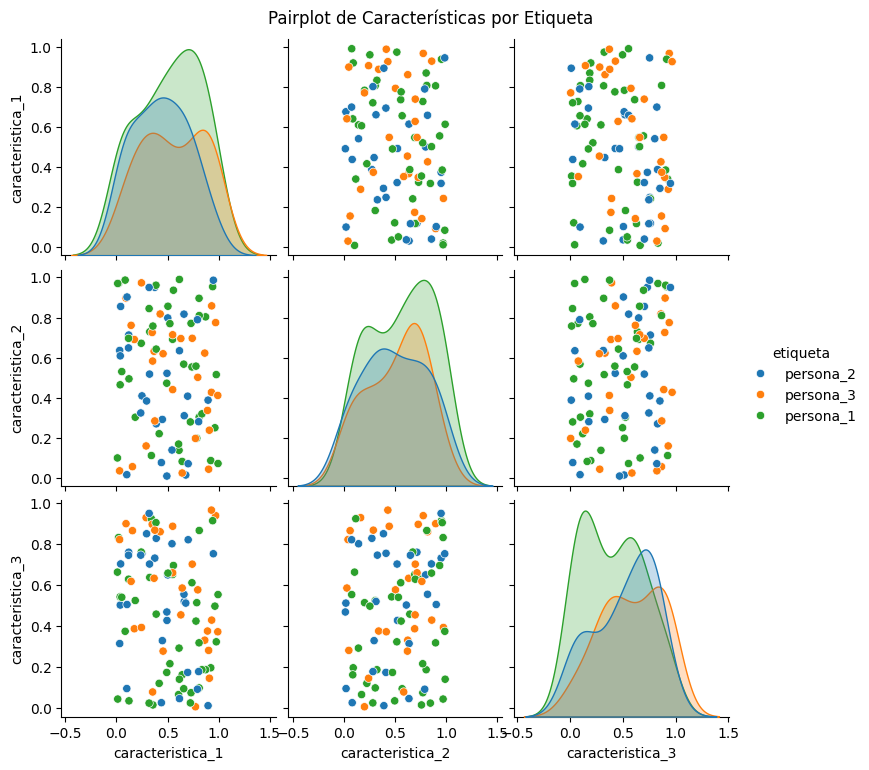

In [8]:
# 3. Análisis bivariado usando un Pairplot para explorar la relación entre múltiples características y las etiquetas
sns.pairplot(df, hue='etiqueta', vars=['caracteristica_1', 'caracteristica_2', 'caracteristica_3'])
plt.suptitle('Pairplot de Características por Etiqueta', y=1.02)
plt.show()

El análisis bivariado en visión por computadora implica examinar cómo se distribuyen los datos entre diferentes categorías y cómo interactúan dos variables
específicas, como una variable dependiente (etiquetas) y una independiente (características o condiciones externas). Este análisis ayuda a identificar patrones,
sesgos o relaciones significativas. Aquí te detallo cómo abordar el análisis bivariado en este contexto:

1. Análisis por pares de variables comunes
a) Identidad y Expresión Facial
Ejemplo: Distribución de expresiones (felicidad, tristeza, enojo) en función de las identidades.
Gráficos sugeridos:
Diagramas de barras apiladas: Muestran la proporción de cada expresión por identidad.
Heatmaps: Muestran frecuencias para combinaciones de identidad y expresión.
b) Edad y Género
Ejemplo: Distribución de edades separadas por género.
Gráficos sugeridos:
Histogramas por grupos: Comparar la distribución de edades para cada género.
Boxplots: Evaluar diferencias en la dispersión de edades entre géneros.
c) Pose y Expresión Facial
Ejemplo: ¿Hay poses específicas asociadas con ciertas expresiones (e.g., cabeza inclinada al sonreír)?
Gráficos sugeridos:
Gráficos de dispersión (pose en el eje x, expresión como color o símbolo).
Diagramas de violín: Muestran la densidad de poses asociadas con expresiones.
d) Accesorios y Edad/Género
Ejemplo: Distribución de accesorios (como gafas) en función de género o edad.
Gráficos sugeridos:
Diagramas de barras agrupadas: Comparar la frecuencia de uso de gafas entre diferentes grupos.
2. Métodos para analizar la relación entre variables
Tablas de contingencia:

Evaluar frecuencias absolutas y relativas entre categorías de dos variables.
Ejemplo: Número de rostros masculinos y femeninos con cada expresión facial.
Coeficientes de correlación:

Pearson, Spearman, o Chi-cuadrado para medir relaciones entre variables continuas (edad, pose) y categóricas (género, expresión).
Test de independencia:

Usar pruebas estadísticas como el test Chi-cuadrado para evaluar si las categorías son independientes.
Ejemplo: ¿La distribución de género es independiente de las expresiones?
3. Identificación de sesgos y patrones
El análisis bivariado puede revelar sesgos importantes en los datos:

Género y clase mayoritaria:
Algunas expresiones (como enojo) pueden estar sobrerrepresentadas en un género.
Edad y accesorios:
Las gafas pueden ser más frecuentes en rangos de edad más altos.
Etnicidad y expresión:
Sesgos hacia ciertas combinaciones (e.g., rostros caucásicos felices).
4. Gráficos sugeridos
Heatmaps:
Visualizar frecuencias absolutas o relativas en una cuadrícula de dos variables categóricas.
Scatterplots con variables continuas:
Ejemplo: Dispersión entre pose y edad.
Boxplots y diagramas de violín:
Evaluar distribución y dispersión de una variable continua entre diferentes categorías.
Gráficos apilados o de barras:
Comparar proporciones entre categorías.
Ejemplo práctico
Supongamos que tienes un conjunto de datos con:

Género (Masculino/Femenino).
Expresión facial (Happiness, Sadness, Anger).
Edad (numérica).
Paso 1: Tablas de contingencia
Crear una tabla para mostrar la frecuencia de cada combinación de género y expresión.

Género	Happiness	Sadness	Anger
Masculino	500	200	150
Femenino	600	250	100
Paso 2: Gráficos de dispersión
Visualizar la relación entre la edad y la intensidad de felicidad en un gráfico de dispersión.

Paso 3: Estadísticas de asociación
Calcular correlaciones entre variables, como la intensidad de felicidad y la pose.

_________________________________________________________________________________________________________________________________________________________
¿Se deberían normalizar las imágenes para visualizarlas mejor?
Para este proyecto no puesto que se pretende usar la misma camara en las mismas condiciones de luz para generar toda la base de datos necesaria
Ademas con el scrip propuesto al inicio es suficiente con el recorte de 150 x 150 pixeles

_________________________________________________________________________________________________________________________________________________________
¿Hay desequilibrio en las clases de la variable objetivo?

El desequilibrio en las clases de la variable objetivo es un problema común en el análisis de rostros con visión por computadora. Esto ocurre cuando las
clases no están distribuidas uniformemente, lo que puede sesgar los modelos hacia las clases mayoritarias y reducir el rendimiento en las minoritarias.

Los datos con los que se trabaja son bastante homogeneos y no necesitamos hacer ajustes